这个ipynb的作用：评估了最佳的Nv，对于TI46任务

In [2]:
import os
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm
import pickle

from pathlib import Path

CANDIDATES = [
    
    Path(r"C:\Users\tom\Desktop\Repository"),
    Path(r"C:\Users\Chen\Desktop\Repository"),
]
searchpaths = [p for p in CANDIDATES if p.exists()]

#tuple of repos
repos = ('machine_learning_library',)

import sys
import os
# In Jupyter notebooks, __file__ is not defined. Use the current working directory instead.
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import repo_tools
repo_tools.repos_path_finder(searchpaths, repos)
from spnc import spnc_anisotropy
import spnc_ml as ml
from deterministic_mask import fixed_seed_mask, max_sequences_mask

from single_node_res import single_node_reservoir
import ridge_regression as RR
from linear_layer import *
from mask import binary_mask
from utility import *
from NARMA10 import NARMA10
from datasets.load_TI46_digits import *
import datasets.load_TI46 as TI46
from sklearn.metrics import classification_report
from formal_Parameter_Dynamics_Preformance import *

In [18]:
## 设置参数
params = ReservoirParams(
        h=0.4, m0=0.03, Nvirt=200, beta_prime=50,
        params={'theta': 0.2, 'gamma': 0.045, 'Nvirt': 200}
    )

# # 评估MC
MC = evaluate_MC(params)
print('MC:', MC)

MC: {'MC': np.float64(5.973888639065236)}


In [8]:
# 设置参数
params = ReservoirParams(
        h=0.4, m0=0.003779957730835859, Nvirt=200, beta_prime=20,
        params={'theta': 0.21914938870841222, 'gamma': 0.0707559779961009, 'Nvirt': 200}
    )

# # 评估MC
# MC = evaluate_MC(params)
# print('MC:', MC)

narma10_dict = {}
# 评估NARMA10
narma10_dict = evaluate_NARMA10(params)

Seed Training: 1234
len(x_train): 2000
error with zero =  0.009066945964734917
0.0077752878930960915 0.7967814126610895


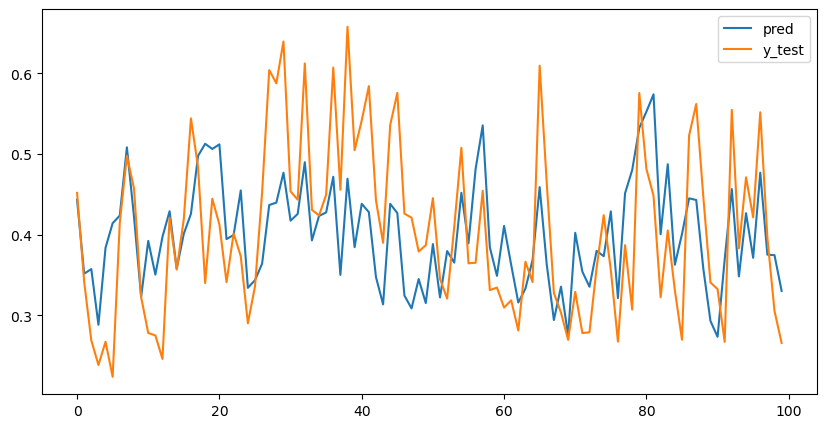

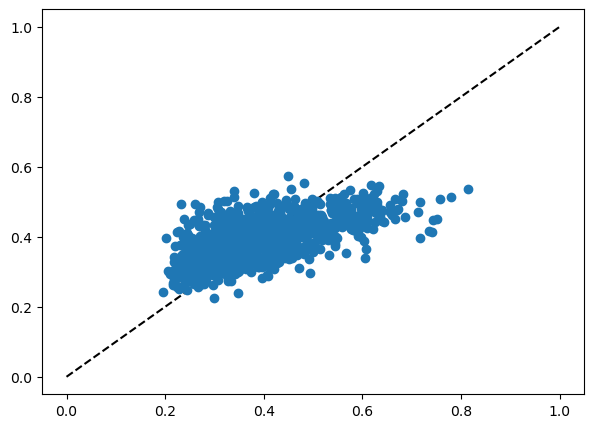

In [12]:
#可视化pred和y_test
plt.figure(figsize=(10, 5))
plt.plot(narma10_dict['pred'][200:300], label='pred')
plt.plot(narma10_dict['y_test'][200:300], label='y_test')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot( np.linspace(0.0,1.0), np.linspace(0.0,1.0), 'k--')
plt.plot(narma10_dict['y_test'], narma10_dict['pred'], 'o')
plt.show()


In [13]:
# 设置参数
params_3 = ReservoirParams(
        h=0.4, m0=0.007868777052548386, Nvirt=200, beta_prime=20,
        params={'theta': 0.10220030209645715, 'gamma': 0.1327246523368315, 'Nvirt': 200}
    )

# # 评估MC
# MC = evaluate_MC(params)
# print('MC:', MC)

# 评估NARMA10
narma10_dict_3 = {}
narma10_dict_3 = evaluate_NARMA10(params_3)


Seed Training: 1234
len(x_train): 2000
error with zero =  0.004706005872110248
0.005569533434269705 0.6743577652048013


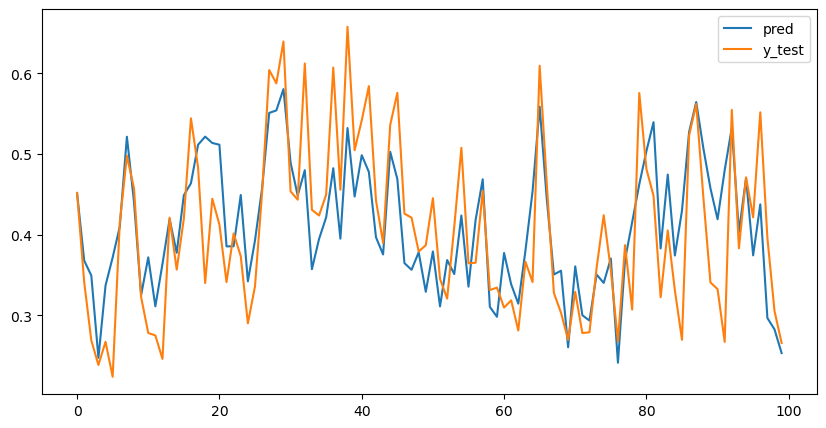

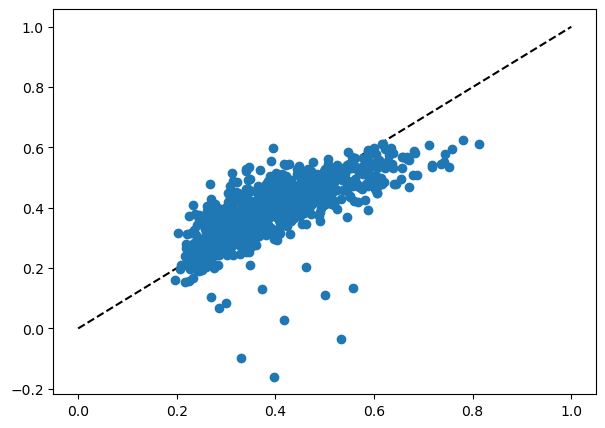

In [14]:
#可视化pred和y_test
plt.figure(figsize=(10, 5))
plt.plot(narma10_dict_3['pred'][200:300], label='pred')
plt.plot(narma10_dict_3['y_test'][200:300], label='y_test')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot( np.linspace(0.0,1.0), np.linspace(0.0,1.0), 'k--')
plt.plot(narma10_dict_3['y_test'], narma10_dict_3['pred'], 'o')
plt.show()

从以上两个储层的表现来看，softgate起到了筛选的作用。

In [15]:
# 评估TI46
acc = evaluate_Ti46(params)
print('TI46 with No204:', acc)

acc_3 = evaluate_Ti46(params_3)
print('TI46 with No3:', acc_3)

Samples for training:  500
first 5 samples for training:  [array([ 0,  0, -1, ...,  0,  0,  0], shape=(12800,), dtype=int16)
 array([ 0,  0,  0, ..., -1,  0,  0], shape=(11520,), dtype=int16)
 array([-1, -1,  0, ...,  0,  0,  1], shape=(16128,), dtype=int16)
 array([-1,  0, -1, ..., -1, -1, -1], shape=(19456,), dtype=int16)
 array([-4, -1,  1, ...,  1,  0,  0], shape=(17152,), dtype=int16)]
Samples for test:  795
Using MFCC preprocessing
Nin = 13 , Nout =  10 , Nvirt =  200
Deterministic mask will be used
the shape of the mask is:  (200, 13)
Seed Training: 1234
len(x_train): 7999
error with zero =  0.07700729697007304
Optimal regression parameter =  1.6487212707000667
Train report
              precision    recall  f1-score   support

           0      0.917     0.825     0.868        40
           1      0.919     0.850     0.883        40
           2      0.838     0.775     0.805        40
           3      0.824     0.700     0.757        40
           4      0.905     0.950     0

额外计算：
目前TI46的结果看起来非常怪，我担心是之前的验证中误改了TI46程序的设定。所以我需要额外重新测试下TI46的结果。以bestMC为例，

In [2]:
# 设置参数 with Nvirt=50
params_bestMC = ReservoirParams(
        h=0.4, m0=0.008, Nvirt=50, beta_prime=50,
        params={'theta': 0.156493838858319, 'gamma': 0.0460842584494091, 'Nvirt': 50}
    )

# 评估TI46
acc_bestMC = evaluate_Ti46(params_bestMC)
print('TI46 with bestMC:', acc_bestMC)


Samples for training:  500
first 5 samples for training:  [array([ 0, -1, -1, ..., -1,  0,  0], shape=(14848,), dtype=int16)
 array([-1,  0,  0, ..., -2, -2, -2], shape=(13056,), dtype=int16)
 array([-1, -1, -1, ...,  2,  1,  1], shape=(13056,), dtype=int16)
 array([ 0, -1,  0, ..., -1, -1, -1], shape=(16640,), dtype=int16)
 array([-1,  0, -1, ...,  0, -1,  0], shape=(12800,), dtype=int16)]
Samples for test:  795
Using MFCC preprocessing
Nin = 13 , Nout =  10 , Nvirt =  50
Deterministic mask will be used
the shape of the mask is:  (50, 13)
Seed Training: 1234
len(x_train): 7999
error with zero =  0.0738574885570247
Optimal regression parameter =  0.0024787521766663234
Train report
              precision    recall  f1-score   support

           0      0.875     0.875     0.875        40
           1      0.917     0.825     0.868        40
           2      0.941     0.800     0.865        40
           3      0.884     0.950     0.916        40
           4      0.909     1.000     0

固定seed版本下，bestMC（Nv=50）的acc为0.63. 已经将TI46程序还原为原始版本（没有seed控制）。之后的acc为0.86

In [3]:
# 再试一次，看看默认情况下trainsignal是否一致
# 设置参数 with Nvirt=50
params_bestMC_new = ReservoirParams(
        h=0.4, m0=0.008, Nvirt=50, beta_prime=50,
        params={'theta': 0.156493838858319, 'gamma': 0.0460842584494091, 'Nvirt': 50}
    )

# 评估TI46
acc_bestMC_new = evaluate_Ti46(params_bestMC_new)
print('TI46 with bestMC:', acc_bestMC)

Samples for training:  500
first 5 samples for training:  [array([ 0, -1, -1, ..., -1,  0,  0], shape=(14848,), dtype=int16)
 array([-1,  0,  0, ..., -2, -2, -2], shape=(13056,), dtype=int16)
 array([-1, -1, -1, ...,  2,  1,  1], shape=(13056,), dtype=int16)
 array([ 0, -1,  0, ..., -1, -1, -1], shape=(16640,), dtype=int16)
 array([-1,  0, -1, ...,  0, -1,  0], shape=(12800,), dtype=int16)]
Samples for test:  795
Using MFCC preprocessing
Nin = 13 , Nout =  10 , Nvirt =  50
Deterministic mask will be used
the shape of the mask is:  (50, 13)
Seed Training: 1234
len(x_train): 7999
error with zero =  0.07368934600300082
Optimal regression parameter =  0.0027394448187683293
Train report
              precision    recall  f1-score   support

           0      0.923     0.900     0.911        40
           1      0.878     0.900     0.889        40
           2      0.938     0.750     0.833        40
           3      0.822     0.925     0.871        40
           4      0.889     1.000     

想对比下不同Nv情况下，TI46的结果的差异是多少

In [12]:
# Nv_lists有两部分拼接而成
one_part = np.arange(10, 101, 10)
two_part = [125, 150, 175, 200]
Nv_lists = np.concatenate([one_part, two_part])

acc_list = []

for idx, Nv in enumerate(Nv_lists):
    idx = ReservoirParams(
        h=0.4, m0=0.008, Nvirt=Nv, beta_prime=50,
        params={'theta': 0.156493838858319, 'gamma': 0.0460842584494091, 'Nvirt': Nv}
    )
    acc = evaluate_Ti46(idx)['acc']
    acc_list.append(acc)

# 将acc_list和Nv_lists保存为pkl文件
import pickle
data = {
    'acc_list': acc_list,
    'Nv_lists': Nv_lists
}
with open('TI46_bestMC_NvInfluence.pkl', 'wb') as f:
    pickle.dump(data, f)






Samples for training:  500
first 5 samples for training:  [array([ 0, -1, -1, ..., -1,  0,  0], shape=(14848,), dtype=int16)
 array([-1,  0,  0, ..., -2, -2, -2], shape=(13056,), dtype=int16)
 array([-1, -1, -1, ...,  2,  1,  1], shape=(13056,), dtype=int16)
 array([ 0, -1,  0, ..., -1, -1, -1], shape=(16640,), dtype=int16)
 array([-1,  0, -1, ...,  0, -1,  0], shape=(12800,), dtype=int16)]
Samples for test:  795
Using MFCC preprocessing
Nin = 13 , Nout =  10 , Nvirt =  10
Deterministic mask will be used
the shape of the mask is:  (10, 13)
Seed Training: 1234
len(x_train): 7999
error with zero =  0.08192638741249347
Optimal regression parameter =  0.13533528323660884
Train report
              precision    recall  f1-score   support

           0      1.000     0.050     0.095        40
           1      0.737     0.700     0.718        40
           2      0.775     0.775     0.775        40
           3      0.833     0.625     0.714        40
           4      0.795     0.875     0.

c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

              precision    recall  f1-score   support

           0      0.186     1.000     0.314        75
           1      0.000     0.000     0.000        80
           2      0.806     0.312     0.450        80
           3      0.000     0.000     0.000        80
           4      1.000     0.125     0.222        80
           5      0.414     0.963     0.579        80
           6      0.824     0.875     0.848        80
           7      1.000     0.037     0.072        80
           8      0.906     0.600     0.722        80
           9      1.000     0.300     0.462        80

    accuracy                          0.418       795
   macro avg      0.614     0.421     0.367       795
weighted avg      0.616     0.418     0.367       795

Samples for training:  500
first 5 samples for training:  [array([ 0, -1, -1, ..., -1,  0,  0], shape=(14848,), dtype=int16)
 array([-1,  0,  0, ..., -2, -2, -2], shape=(13056,), dtype=int16)
 array([-1, -1, -1, ...,  2,  1,  1], shape=(1305

c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

              precision    recall  f1-score   support

           0      1.000     0.027     0.052        75
           1      1.000     0.013     0.025        80
           2      0.000     0.000     0.000        80
           3      0.000     0.000     0.000        80
           4      0.312     1.000     0.476        80
           5      0.174     1.000     0.297        80
           6      1.000     0.025     0.049        80
           7      0.353     0.300     0.324        80
           8      0.500     0.013     0.024        80
           9      1.000     0.062     0.118        80

    accuracy                          0.245       795
   macro avg      0.534     0.244     0.136       795
weighted avg      0.531     0.245     0.137       795

Samples for training:  500
first 5 samples for training:  [array([ 0, -1, -1, ..., -1,  0,  0], shape=(14848,), dtype=int16)
 array([-1,  0,  0, ..., -2, -2, -2], shape=(13056,), dtype=int16)
 array([-1, -1, -1, ...,  2,  1,  1], shape=(1305

c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

              precision    recall  f1-score   support

           0      0.000     0.000     0.000        75
           1      0.667     0.100     0.174        80
           2      0.762     0.762     0.762        80
           3      0.000     0.000     0.000        80
           4      0.116     1.000     0.208        80
           5      1.000     0.113     0.202        80
           6      0.000     0.000     0.000        80
           7      0.000     0.000     0.000        80
           8      0.000     0.000     0.000        80
           9      1.000     0.062     0.118        80

    accuracy                          0.205       795
   macro avg      0.355     0.204     0.146       795
weighted avg      0.357     0.205     0.147       795

Samples for training:  500
first 5 samples for training:  [array([ 0, -1, -1, ..., -1,  0,  0], shape=(14848,), dtype=int16)
 array([-1,  0,  0, ..., -2, -2, -2], shape=(13056,), dtype=int16)
 array([-1, -1, -1, ...,  2,  1,  1], shape=(1305

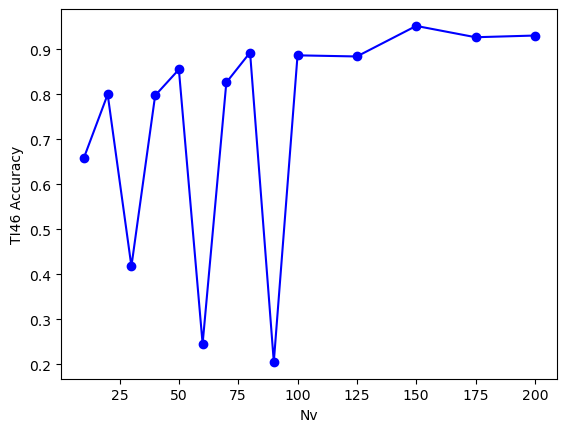

In [13]:
plt.figure()
plt.plot(Nv_lists, acc_list, marker='o', linestyle='-', color='b')
plt.xlabel('Nv')
plt.ylabel('TI46 Accuracy')
plt.show()


In [14]:
# 在good reservoir 上做相同的事
# Nv_lists有两部分拼接而成
one_part = np.arange(10, 101, 10)
two_part = [125, 150, 175, 200]
Nv_lists = np.concatenate([one_part, two_part])

acc_list_good = []

for idx, Nv in enumerate(Nv_lists):
    idx = ReservoirParams(
        h=0.4, m0=0.0516554082018051, Nvirt=Nv, beta_prime=50,
        params={'theta': 0.2, 'gamma': 0.0480297911638143, 'Nvirt': Nv}
    )
    acc = evaluate_Ti46(idx)['acc']
    acc_list_good.append(acc)

# 将acc_list和Nv_lists保存为pkl文件
import pickle
data = {
    'acc_list': acc_list_good,
    'Nv_lists': Nv_lists
}
with open('TI46_good_NvInfluence.pkl', 'wb') as f:
    pickle.dump(data, f)

Samples for training:  500
first 5 samples for training:  [array([ 0, -1, -1, ..., -1,  0,  0], shape=(14848,), dtype=int16)
 array([-1,  0,  0, ..., -2, -2, -2], shape=(13056,), dtype=int16)
 array([-1, -1, -1, ...,  2,  1,  1], shape=(13056,), dtype=int16)
 array([ 0, -1,  0, ..., -1, -1, -1], shape=(16640,), dtype=int16)
 array([-1,  0, -1, ...,  0, -1,  0], shape=(12800,), dtype=int16)]
Samples for test:  795
Using MFCC preprocessing
Nin = 13 , Nout =  10 , Nvirt =  10
Deterministic mask will be used
the shape of the mask is:  (10, 13)
Seed Training: 1234
len(x_train): 7999
error with zero =  0.08258513767583411
Optimal regression parameter =  2.4596031111568544
Train report
              precision    recall  f1-score   support

           0      1.000     0.200     0.333        40
           1      1.000     0.500     0.667        40
           2      0.656     0.525     0.583        40
           3      0.675     0.675     0.675        40
           4      0.650     0.975     0.7

c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

              precision    recall  f1-score   support

           0      0.000     0.000     0.000        75
           1      0.378     0.425     0.400        80
           2      0.000     0.000     0.000        80
           3      0.667     0.025     0.048        80
           4      0.000     0.000     0.000        80
           5      0.255     0.350     0.295        80
           6      0.000     0.000     0.000        80
           7      0.258     0.762     0.386        80
           8      0.000     0.000     0.000        80
           9      0.214     0.950     0.349        80

    accuracy                          0.253       795
   macro avg      0.177     0.251     0.148       795
weighted avg      0.178     0.253     0.149       795

Samples for training:  500
first 5 samples for training:  [array([ 0, -1, -1, ..., -1,  0,  0], shape=(14848,), dtype=int16)
 array([-1,  0,  0, ..., -2, -2, -2], shape=(13056,), dtype=int16)
 array([-1, -1, -1, ...,  2,  1,  1], shape=(1305

c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

              precision    recall  f1-score   support

           0      0.000     0.000     0.000        75
           1      0.000     0.000     0.000        80
           2      0.000     0.000     0.000        80
           3      0.000     0.000     0.000        80
           4      0.000     0.000     0.000        80
           5      0.000     0.000     0.000        80
           6      0.000     0.000     0.000        80
           7      0.000     0.000     0.000        80
           8      0.000     0.000     0.000        80
           9      0.101     1.000     0.183        80

    accuracy                          0.101       795
   macro avg      0.010     0.100     0.018       795
weighted avg      0.010     0.101     0.018       795

Samples for training:  500
first 5 samples for training:  [array([ 0, -1, -1, ..., -1,  0,  0], shape=(14848,), dtype=int16)
 array([-1,  0,  0, ..., -2, -2, -2], shape=(13056,), dtype=int16)
 array([-1, -1, -1, ...,  2,  1,  1], shape=(1305

c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

              precision    recall  f1-score   support

           0      0.000     0.000     0.000        75
           1      0.000     0.000     0.000        80
           2      0.000     0.000     0.000        80
           3      0.000     0.000     0.000        80
           4      0.000     0.000     0.000        80
           5      0.167     0.013     0.023        80
           6      0.000     0.000     0.000        80
           7      0.059     0.075     0.066        80
           8      0.000     0.000     0.000        80
           9      0.116     1.000     0.209        80

    accuracy                          0.109       795
   macro avg      0.034     0.109     0.030       795
weighted avg      0.034     0.109     0.030       795

Samples for training:  500
first 5 samples for training:  [array([ 0, -1, -1, ..., -1,  0,  0], shape=(14848,), dtype=int16)
 array([-1,  0,  0, ..., -2, -2, -2], shape=(13056,), dtype=int16)
 array([-1, -1, -1, ...,  2,  1,  1], shape=(1305

c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

              precision    recall  f1-score   support

           0      0.000     0.000     0.000        75
           1      0.000     0.000     0.000        80
           2      0.119     0.688     0.202        80
           3      0.000     0.000     0.000        80
           4      0.000     0.000     0.000        80
           5      0.000     0.000     0.000        80
           6      0.000     0.000     0.000        80
           7      0.000     0.000     0.000        80
           8      0.000     0.000     0.000        80
           9      0.106     0.438     0.170        80

    accuracy                          0.113       795
   macro avg      0.022     0.113     0.037       795
weighted avg      0.023     0.113     0.037       795

Samples for training:  500
first 5 samples for training:  [array([ 0, -1, -1, ..., -1,  0,  0], shape=(14848,), dtype=int16)
 array([-1,  0,  0, ..., -2, -2, -2], shape=(13056,), dtype=int16)
 array([-1, -1, -1, ...,  2,  1,  1], shape=(1305

c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

              precision    recall  f1-score   support

           0      0.000     0.000     0.000        75
           1      1.000     0.138     0.242        80
           2      0.256     1.000     0.407        80
           3      0.000     0.000     0.000        80
           4      0.388     1.000     0.559        80
           5      0.000     0.000     0.000        80
           6      1.000     0.225     0.367        80
           7      0.617     0.625     0.621        80
           8      1.000     0.013     0.025        80
           9      0.442     0.912     0.596        80

    accuracy                          0.394       795
   macro avg      0.470     0.391     0.282       795
weighted avg      0.473     0.394     0.284       795

Samples for training:  500
first 5 samples for training:  [array([ 0, -1, -1, ..., -1,  0,  0], shape=(14848,), dtype=int16)
 array([-1,  0,  0, ..., -2, -2, -2], shape=(13056,), dtype=int16)
 array([-1, -1, -1, ...,  2,  1,  1], shape=(1305

c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

              precision    recall  f1-score   support

           0      0.000     0.000     0.000        75
           1      0.000     0.000     0.000        80
           2      0.101     1.000     0.183        80
           3      0.000     0.000     0.000        80
           4      0.000     0.000     0.000        80
           5      0.000     0.000     0.000        80
           6      0.000     0.000     0.000        80
           7      0.000     0.000     0.000        80
           8      0.000     0.000     0.000        80
           9      0.000     0.000     0.000        80

    accuracy                          0.101       795
   macro avg      0.010     0.100     0.018       795
weighted avg      0.010     0.101     0.018       795

Samples for training:  500
first 5 samples for training:  [array([ 0, -1, -1, ..., -1,  0,  0], shape=(14848,), dtype=int16)
 array([-1,  0,  0, ..., -2, -2, -2], shape=(13056,), dtype=int16)
 array([-1, -1, -1, ...,  2,  1,  1], shape=(1305

c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

              precision    recall  f1-score   support

           0      0.000     0.000     0.000        75
           1      0.101     1.000     0.183        80
           2      0.000     0.000     0.000        80
           3      0.000     0.000     0.000        80
           4      0.000     0.000     0.000        80
           5      0.000     0.000     0.000        80
           6      0.000     0.000     0.000        80
           7      0.000     0.000     0.000        80
           8      0.000     0.000     0.000        80
           9      0.000     0.000     0.000        80

    accuracy                          0.101       795
   macro avg      0.010     0.100     0.018       795
weighted avg      0.010     0.101     0.018       795

Samples for training:  500
first 5 samples for training:  [array([ 0, -1, -1, ..., -1,  0,  0], shape=(14848,), dtype=int16)
 array([-1,  0,  0, ..., -2, -2, -2], shape=(13056,), dtype=int16)
 array([-1, -1, -1, ...,  2,  1,  1], shape=(1305

c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

              precision    recall  f1-score   support

           0      1.000     0.040     0.077        75
           1      0.885     0.863     0.873        80
           2      0.882     0.838     0.859        80
           3      1.000     0.125     0.222        80
           4      0.748     1.000     0.856        80
           5      0.913     0.787     0.846        80
           6      1.000     0.037     0.072        80
           7      0.000     0.000     0.000        80
           8      0.244     1.000     0.392        80
           9      0.529     0.800     0.637        80

    accuracy                          0.552       795
   macro avg      0.720     0.549     0.483       795
weighted avg      0.718     0.552     0.486       795

Samples for training:  500
first 5 samples for training:  [array([ 0, -1, -1, ..., -1,  0,  0], shape=(14848,), dtype=int16)
 array([-1,  0,  0, ..., -2, -2, -2], shape=(13056,), dtype=int16)
 array([-1, -1, -1, ...,  2,  1,  1], shape=(1305

c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

              precision    recall  f1-score   support

           0      0.000     0.000     0.000        75
           1      0.000     0.000     0.000        80
           2      0.109     1.000     0.197        80
           3      0.000     0.000     0.000        80
           4      1.000     0.025     0.049        80
           5      1.000     0.087     0.161        80
           6      0.000     0.000     0.000        80
           7      0.000     0.000     0.000        80
           8      0.773     0.425     0.548        80
           9      1.000     0.138     0.242        80

    accuracy                          0.169       795
   macro avg      0.388     0.168     0.120       795
weighted avg      0.391     0.169     0.120       795

Samples for training:  500
first 5 samples for training:  [array([ 0, -1, -1, ..., -1,  0,  0], shape=(14848,), dtype=int16)
 array([-1,  0,  0, ..., -2, -2, -2], shape=(13056,), dtype=int16)
 array([-1, -1, -1, ...,  2,  1,  1], shape=(1305

c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chen\.conda\envs\spnc_python_3_12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

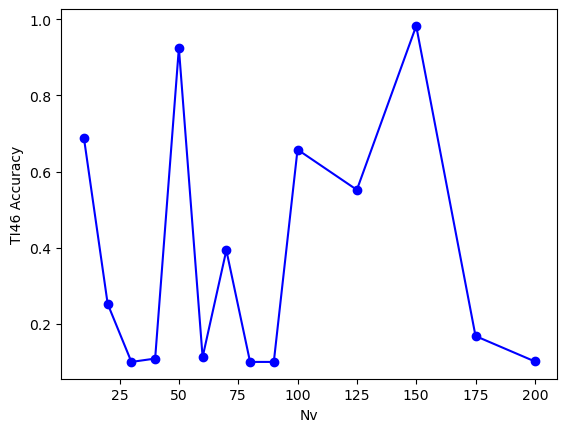

In [15]:
plt.figure()
plt.plot(Nv_lists, acc_list_good, marker='o', linestyle='-', color='b')
plt.xlabel('Nv')
plt.ylabel('TI46 Accuracy')
plt.show()